In [3]:
# Standard library imports
import os
import json
from warnings import simplefilter

# Third-party imports
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import minimize
from scipy.stats import bernoulli, gaussian_kde
from scipy.special import expit as sigmoid
from sklearn.datasets import make_classification, make_moons
from sklearn.model_selection import (
    train_test_split,
    GridSearchCV,
    KFold,
    cross_val_score,
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import ConstantKernel, RBF, RationalQuadratic
from sklearn.metrics import pairwise_distances, confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from matplotlib.colors import Normalize

# Ignore future warnings for cleaner output
simplefilter(action="ignore", category=FutureWarning)

# Matplotlib settings
plt.rcParams["text.usetex"] = True
plt.rcParams.update({"font.family": "serif", "font.serif": ["Times New Roman"]})

# Load Preprocessed Data

In [4]:
with open("testing1_merged.pkl", "rb") as f:
    testing1_merged = pickle.load(f)

with open("testing2_merged.pkl", "rb") as f:
    testing2_merged = pickle.load(f)

In [6]:
testing1_merged

{'testing1_s_true': array([0.19966564, 0.26923263, 0.22400026, ..., 0.24194433, 0.20590155,
        0.20590155]),
 'testing1_s_macrosimgnn_predicted': array([0.17733002, 0.25195526, 0.23660266, ..., 0.22987512, 0.21118116,
        0.19493909]),
 'testing1_s_graph_kernel': array([0.2724425 , 0.32996997, 0.10215266, ..., 0.59596024, 0.6237718 ,
        0.56902512]),
 'testing1_nged_true': array([1.61111113, 1.31217947, 1.49610807, ..., 1.41904763, 1.58035715,
        1.58035715]),
 'testing1_nged_macrosimgnn_predicted': array([1.72974278, 1.37850373, 1.4413731 , ..., 1.47021905, 1.55503895,
        1.63506812]),
 'testing1_nged_graph_kernel': array([1.3003277 , 1.10875362, 2.28128688, ..., 0.51758132, 0.47197068,
        0.56383071]),
 'testing1_ged_true': array([ 7.25      ,  5.24871795,  5.98443223, ..., 10.64285714,
        12.64285714, 12.64285714]),
 'testing1_ged_macrosimgnn_predicted': array([ 7.78384251,  5.51401494,  5.7654924 , ..., 11.02664289,
        12.44031162, 13.08054495

In [7]:
testing2_merged

{'testing2_s_true': array([0.40252054, 0.36475784, 0.3758612 , ..., 0.50959367, 0.3972947 ,
        0.65952605]),
 'testing2_s_macrosimgnn_predicted': array([0.38641311, 0.3567877 , 0.40297973, ..., 0.43707344, 0.37475781,
        0.59035918]),
 'testing2_s_graph_kernel': array([0.22861423, 0.08805593, 0.23579992, ..., 0.24431259, 0.92176231,
        0.48954286]),
 'testing2_nged_true': array([0.91000916, 1.00852161, 0.97853536, ..., 0.6741416 , 0.92307696,
        0.41623381]),
 'testing2_nged_macrosimgnn_predicted': array([0.95084824, 1.03061436, 0.90886901, ..., 0.82765404, 0.9814753 ,
        0.52702415]),
 'testing2_nged_graph_kernel': array([1.4757193 , 2.42978314, 1.44477164, ..., 1.40930675, 0.08146789,
        0.71428325]),
 'testing2_ged_true': array([5.00505051, 5.54686877, 5.87121212, ..., 3.37070814, 6.        ,
        2.08116883]),
 'testing2_ged_macrosimgnn_predicted': array([5.22966534, 5.66837899, 5.45321407, ..., 4.13827022, 6.37958944,
        2.63512073]),
 'testin

# $s$

## Testing-1 

### Testing-1 True $s$  vs $s$ by MacroSimGNN

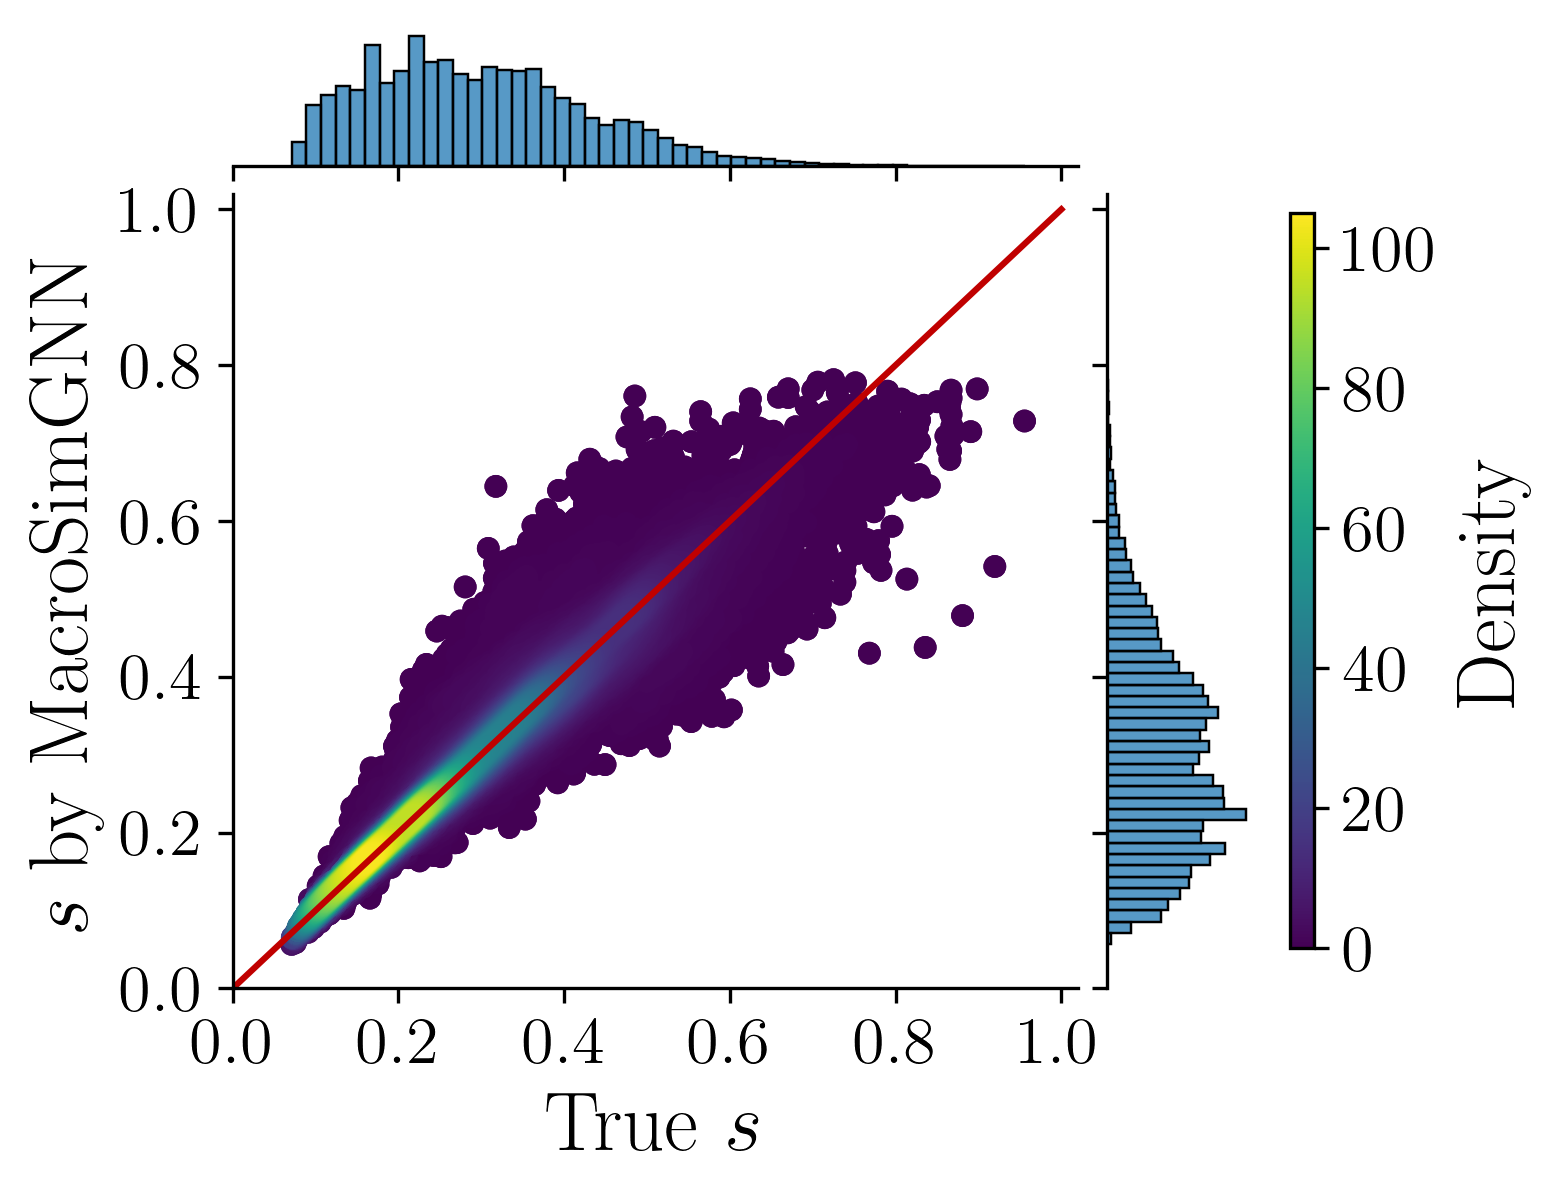

In [42]:
xy = np.vstack(
    [
        testing1_merged["testing1_s_true"],
        testing1_merged["testing1_s_macrosimgnn_predicted"],
    ]
)
z = gaussian_kde(xy)(xy)
idx = z.argsort()

x = testing1_merged["testing1_s_true"][idx]
y = testing1_merged["testing1_s_macrosimgnn_predicted"][idx]
z_sort = z[idx]

# Create the joint plot
g = sns.jointplot(
    x=x,
    y=y,
    kind="scatter",
    s=20,
    alpha=0.0,
    marginal_kws=dict(
        bins=50,
        fill=True,
    ),
)  # color='blue'

# Clear the axis for replotting with density coloring
g.ax_joint.cla()

kde = z_sort

# norm = Normalize(vmin=0, vmax=105)
# norm = Normalize(vmin=0, vmax=11)
# Plotting using the density for color mapping
scatter = g.ax_joint.scatter(
    x, y, c=kde, s=20, cmap="viridis", norm=Normalize(vmin=0, vmax=105)
)  # ,norm=norm)#'viridis')

# Add the line plot to the main axis
x_line = np.linspace(0, 1, 100)
g.ax_joint.plot(
    x_line,
    x_line,
    c="#C00000",
)

# Set the limits for x and y axes
g.ax_joint.set_xlim(-0.0, 1.02)
g.ax_joint.set_ylim(-0.0, 1.02)


ticks = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
g.ax_joint.set_xticks(ticks)
g.ax_joint.set_yticks(ticks)
g.ax_joint.tick_params(axis="x", labelsize=16, colors="k")
g.ax_joint.tick_params(axis="y", labelsize=16, colors="k")

# Adjust the figure size and DPI
g.fig.set_size_inches(4.1, 3.5)
g.fig.dpi = 300
plt.xlabel(r"True $s$", size=20)
plt.ylabel(r"$s$ by MacroSimGNN", size=20)

# Create an axis for the colorbar
cbar_ax = g.fig.add_axes(
    [0.93, 0.1, 0.02, 0.7]
)  # [x, y, width, height] in figure coordinate
cbar = plt.colorbar(scatter, cax=cbar_ax)
cbar.set_label("Density", fontsize=20)
cbar.ax.tick_params(labelsize=16)
cbar.set_ticks([0, 20, 40, 60, 80, 100])

# Adjust layout
# Adjust the right margin to make space for the colorbar
g.fig.subplots_adjust(right=0.9)

g.savefig("testing1_s_true_vs_macrosimgnn.png", dpi=300)
plt.show()

### Testing-1 True $s$  vs $s$ by Graph Kernel

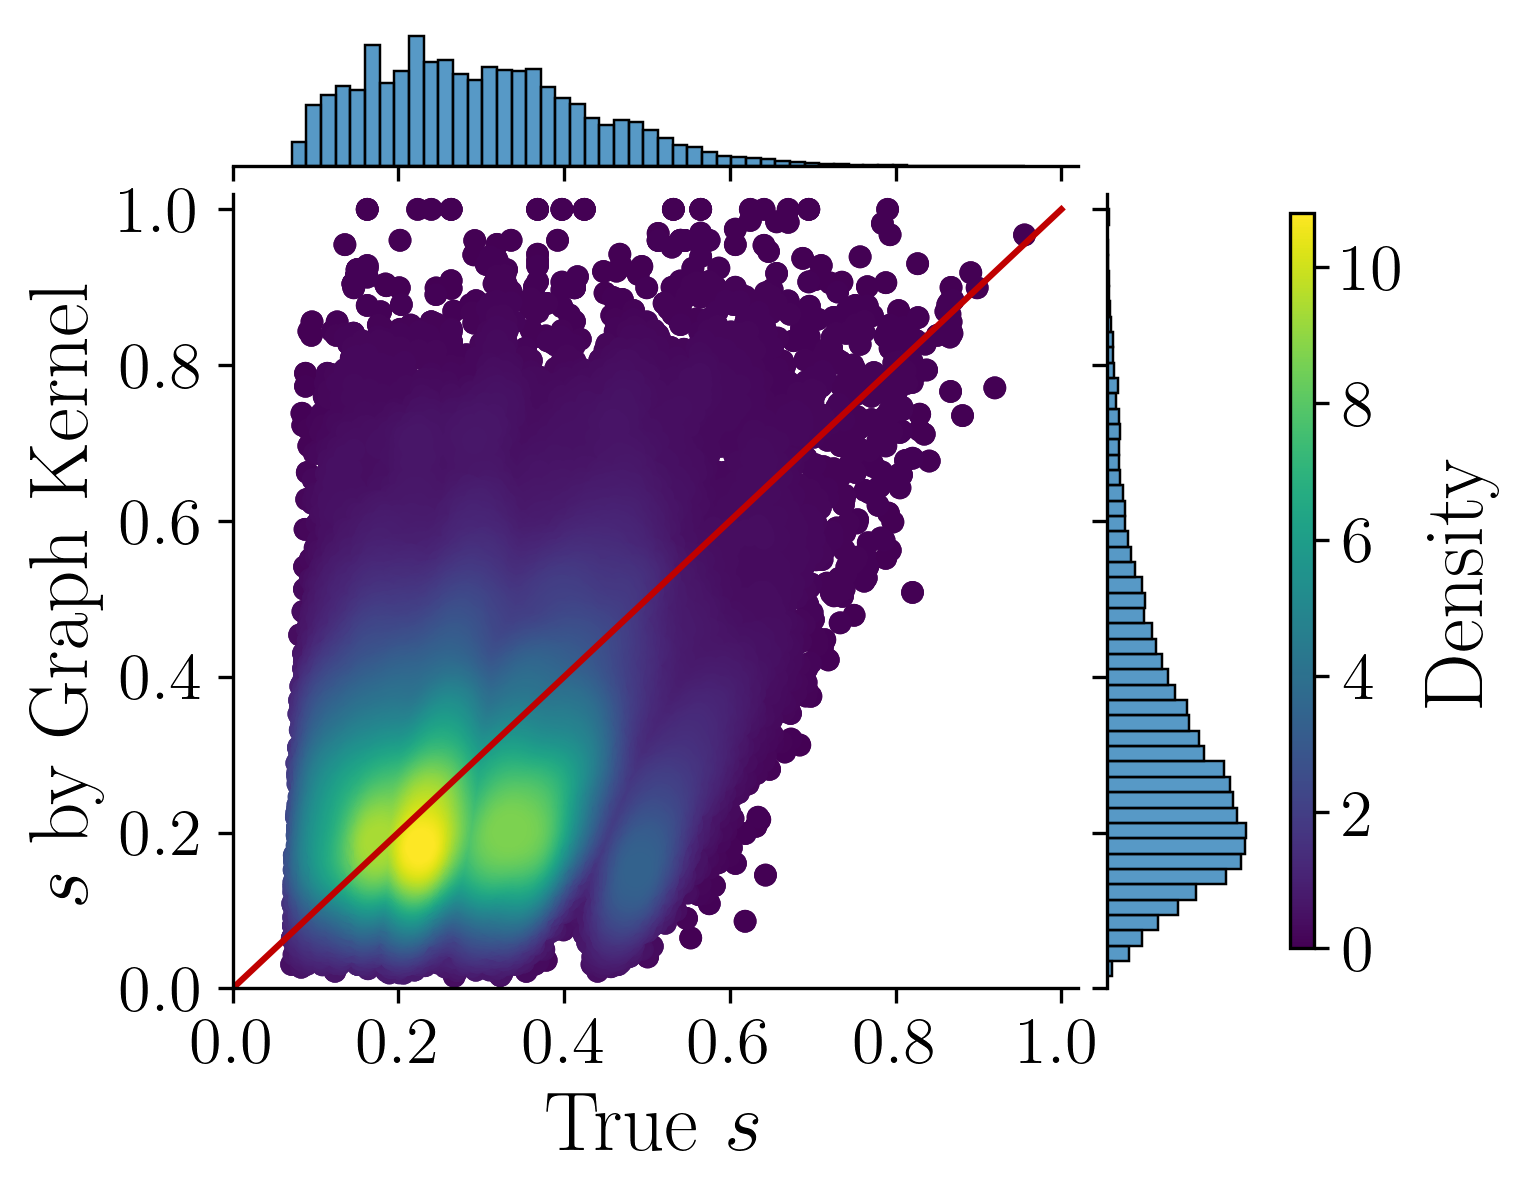

In [38]:
xy = np.vstack(
    [testing1_merged["testing1_s_true"], testing1_merged["testing1_s_graph_kernel"]]
)
z = gaussian_kde(xy)(xy)
idx = z.argsort()

x, y, z_sort = (
    testing1_merged["testing1_s_true"][idx],
    testing1_merged["testing1_s_graph_kernel"][idx],
    z[idx],
)

# Create the joint plot
g = sns.jointplot(
    x=x,
    y=y,
    kind="scatter",
    s=20,
    alpha=0.0,
    marginal_kws=dict(
        bins=50,
        fill=True,
    ),
)

# Clear the axis for replotting with density coloring
g.ax_joint.cla()

kde = z_sort

# Plotting using the density for color mapping
scatter = g.ax_joint.scatter(x, y, c=kde, s=20, cmap="viridis")

# Add the line plot to the main axis
x_line = np.linspace(0, 1, 100)
g.ax_joint.plot(
    x_line,
    x_line,
    c="#C00000",
)

# Set the limits for x and y axes
g.ax_joint.set_xlim(-0.0, 1.02)
g.ax_joint.set_ylim(-0.0, 1.02)

ticks = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
g.ax_joint.set_xticks(ticks)
g.ax_joint.set_yticks(ticks)
g.ax_joint.tick_params(axis="x", labelsize=16, colors="k")
g.ax_joint.tick_params(axis="y", labelsize=16, colors="k")

# Adjust the figure size and DPI
g.fig.set_size_inches(4.1, 3.5)
g.fig.dpi = 300
plt.xlabel(r"True $s$", size=20)
plt.ylabel(r"$s$ by Graph Kernel", size=20)

# Create an axis for the colorbar
cbar_ax = g.fig.add_axes(
    [0.93, 0.1, 0.02, 0.7]
)  # [x, y, width, height] in figure coordinate
cbar = plt.colorbar(scatter, cax=cbar_ax)
cbar.set_label("Density", fontsize=20)
cbar.ax.tick_params(labelsize=16)
cbar.set_ticks([0, 2, 4, 6, 8, 10])

# Adjust layout
g.fig.subplots_adjust(
    right=0.9
)  # Adjust the right margin to make space for the colorbar
g.savefig("testing1_s_true_vs_graph_kernel.png", dpi=300)
plt.show()

## Testing-2

### Testing-2 True $s$  vs $s$ by MacroSimGNN

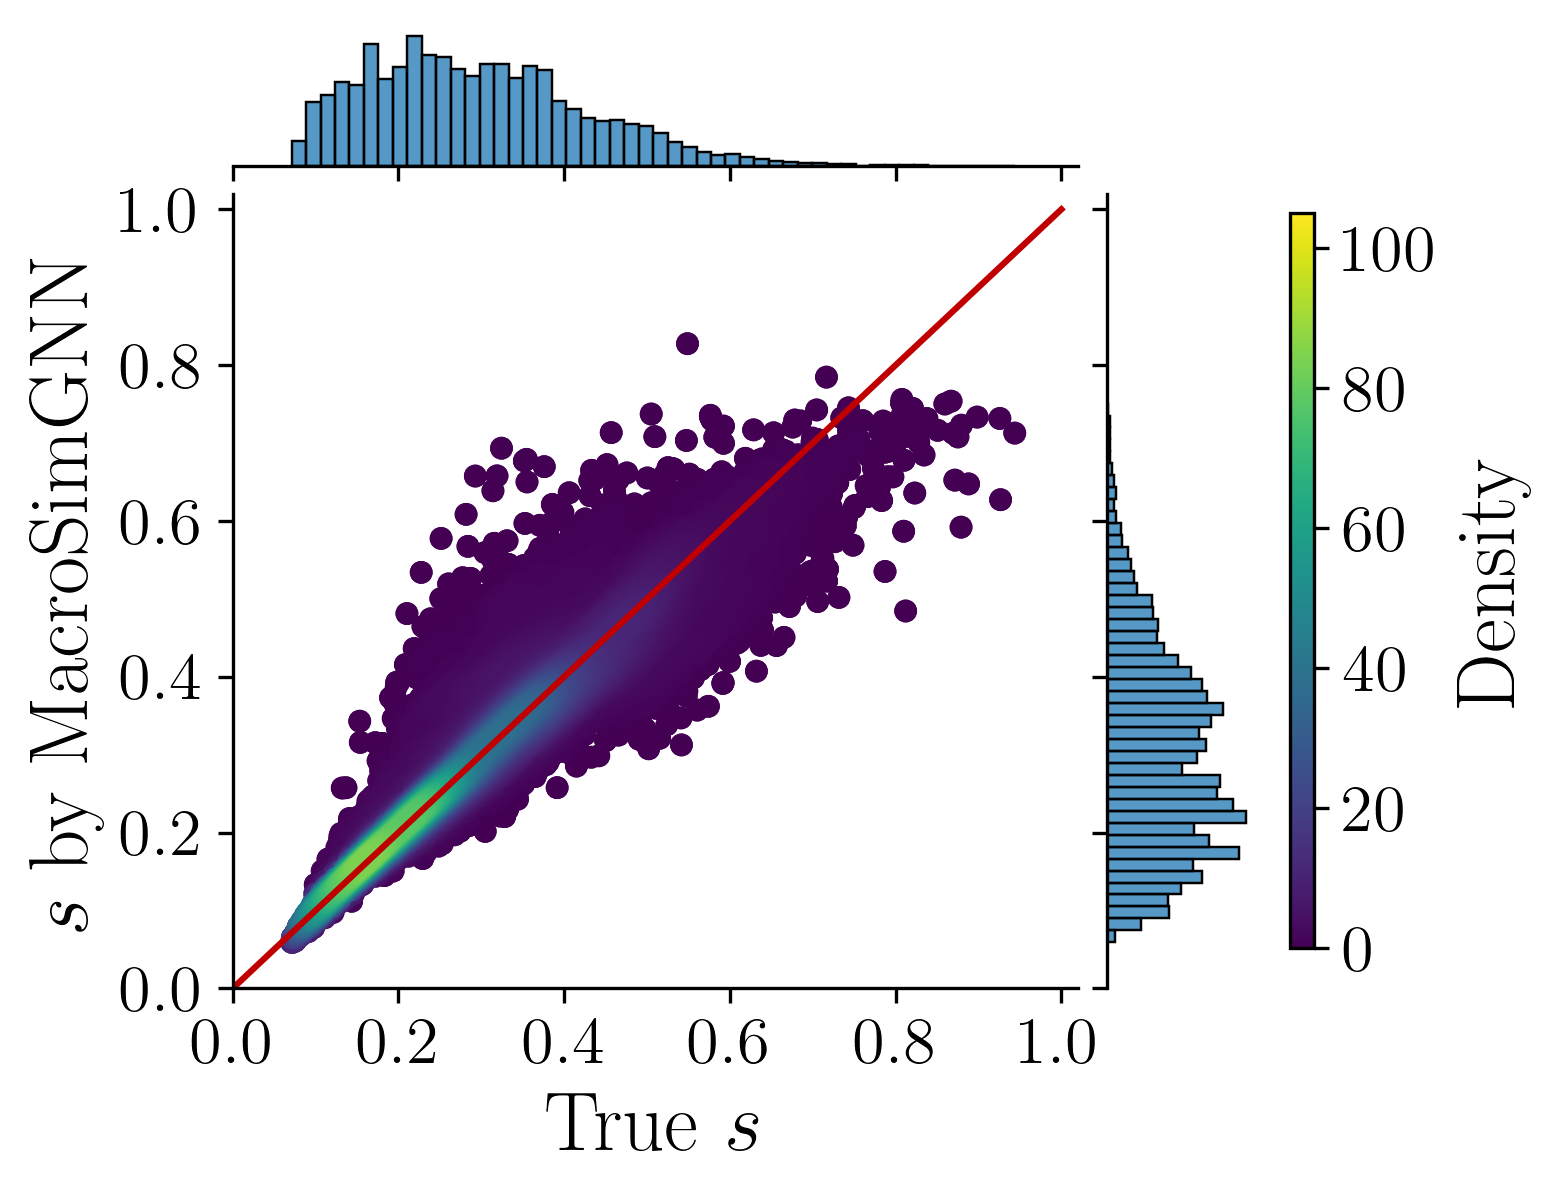

In [41]:
xy = np.vstack(
    [
        testing2_merged["testing2_s_true"],
        testing2_merged["testing2_s_macrosimgnn_predicted"],
    ]
)
z = gaussian_kde(xy)(xy)
idx = z.argsort()

x = testing2_merged["testing2_s_true"][idx]
y = testing2_merged["testing2_s_macrosimgnn_predicted"][idx]
z_sort = z[idx]

# Create the joint plot
g = sns.jointplot(
    x=x,
    y=y,
    kind="scatter",
    s=20,
    alpha=0.0,
    marginal_kws=dict(
        bins=50,
        fill=True,
    ),
)

# Clear the axis for replotting with density coloring
g.ax_joint.cla()

kde = z_sort

# norm = Normalize(vmin=0, vmax=105)
# norm = Normalize(vmin=0, vmax=11)
# Plotting using the density for color mapping
scatter = g.ax_joint.scatter(
    x, y, c=kde, s=20, cmap="viridis", norm=Normalize(vmin=0, vmax=105)
)

# Add the line plot to the main axis
x_line = np.linspace(0, 1, 100)
g.ax_joint.plot(
    x_line,
    x_line,
    c="#C00000",
)

# Set the limits for x and y axes
g.ax_joint.set_xlim(-0.0, 1.02)
g.ax_joint.set_ylim(-0.0, 1.02)


ticks = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
g.ax_joint.set_xticks(ticks)
g.ax_joint.set_yticks(ticks)
g.ax_joint.tick_params(axis="x", labelsize=16, colors="k")
g.ax_joint.tick_params(axis="y", labelsize=16, colors="k")

# Adjust the figure size and DPI
g.fig.set_size_inches(4.1, 3.5)
g.fig.dpi = 300
plt.xlabel(r"True $s$", size=20)
plt.ylabel(r"$s$ by MacroSimGNN", size=20)

# Create an axis for the colorbar
cbar_ax = g.fig.add_axes(
    [0.93, 0.1, 0.02, 0.7]
)  # [x, y, width, height] in figure coordinate
cbar = plt.colorbar(scatter, cax=cbar_ax)
cbar.set_label("Density", fontsize=20)
cbar.ax.tick_params(labelsize=16)
cbar.set_ticks([0, 20, 40, 60, 80, 100])

# Adjust layout
# Adjust the right margin to make space for the colorbar
g.fig.subplots_adjust(right=0.9)

g.savefig("testing2_s_true_vs_macrosimgnn.png", dpi=300)
plt.show()

### Testing-2 True $s$  vs $s$ by Graph Kernel

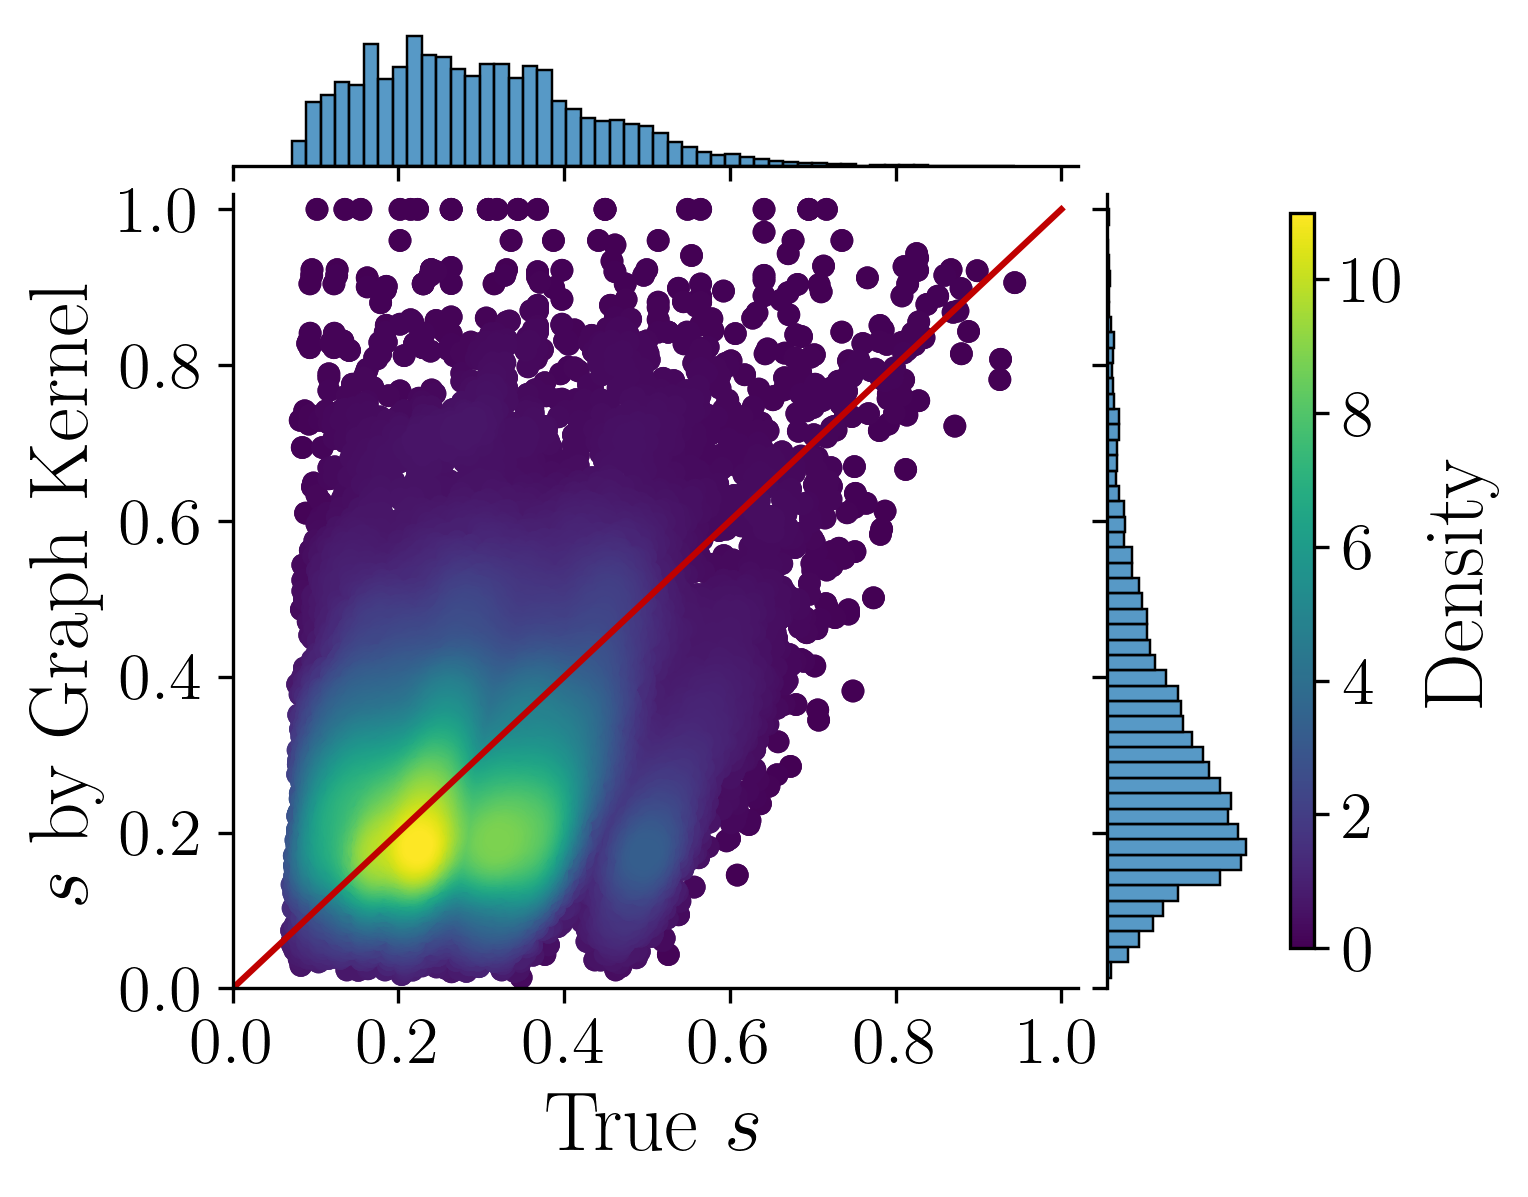

In [34]:
xy = np.vstack(
    [testing2_merged["testing2_s_true"], testing2_merged["testing2_s_graph_kernel"]]
)
z = gaussian_kde(xy)(xy)
idx = z.argsort()

x, y, z_sort = (
    testing2_merged["testing2_s_true"][idx],
    testing2_merged["testing2_s_graph_kernel"][idx],
    z[idx],
)

# Create the joint plot
g = sns.jointplot(
    x=x,
    y=y,
    kind="scatter",
    s=20,
    alpha=0.0,
    marginal_kws=dict(
        bins=50,
        fill=True,
    ),
)

# Clear the axis for replotting with density coloring
g.ax_joint.cla()

kde = z_sort

# Plotting using the density for color mapping
scatter = g.ax_joint.scatter(x, y, c=kde, s=20, cmap="viridis")

# Add the line plot to the main axis
x_line = np.linspace(0, 1, 100)
g.ax_joint.plot(
    x_line,
    x_line,
    c="#C00000",
)

# Set the limits for x and y axes
g.ax_joint.set_xlim(-0.0, 1.02)
g.ax_joint.set_ylim(-0.0, 1.02)

ticks = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
g.ax_joint.set_xticks(ticks)
g.ax_joint.set_yticks(ticks)
g.ax_joint.tick_params(axis="x", labelsize=16, colors="k")
g.ax_joint.tick_params(axis="y", labelsize=16, colors="k")

# Adjust the figure size and DPI
g.fig.set_size_inches(4.1, 3.5)
g.fig.dpi = 300
plt.xlabel(r"True $s$", size=20)
plt.ylabel(r"$s$ by Graph Kernel", size=20)

# Create an axis for the colorbar
cbar_ax = g.fig.add_axes(
    [0.93, 0.1, 0.02, 0.7]
)  # [x, y, width, height] in figure coordinate
cbar = plt.colorbar(scatter, cax=cbar_ax)
cbar.set_label("Density", fontsize=20)
cbar.ax.tick_params(labelsize=16)
cbar.set_ticks([0, 2, 4, 6, 8, 10])

# Adjust layout
g.fig.subplots_adjust(
    right=0.9
)  # Adjust the right margin to make space for the colorbar
g.savefig("testing2_s_true_vs_graph_kernel.png", dpi=300)
plt.show()

# NGED

## Testing-1

### Testing-1 True NGED  vs NGED by MacroSimGNN

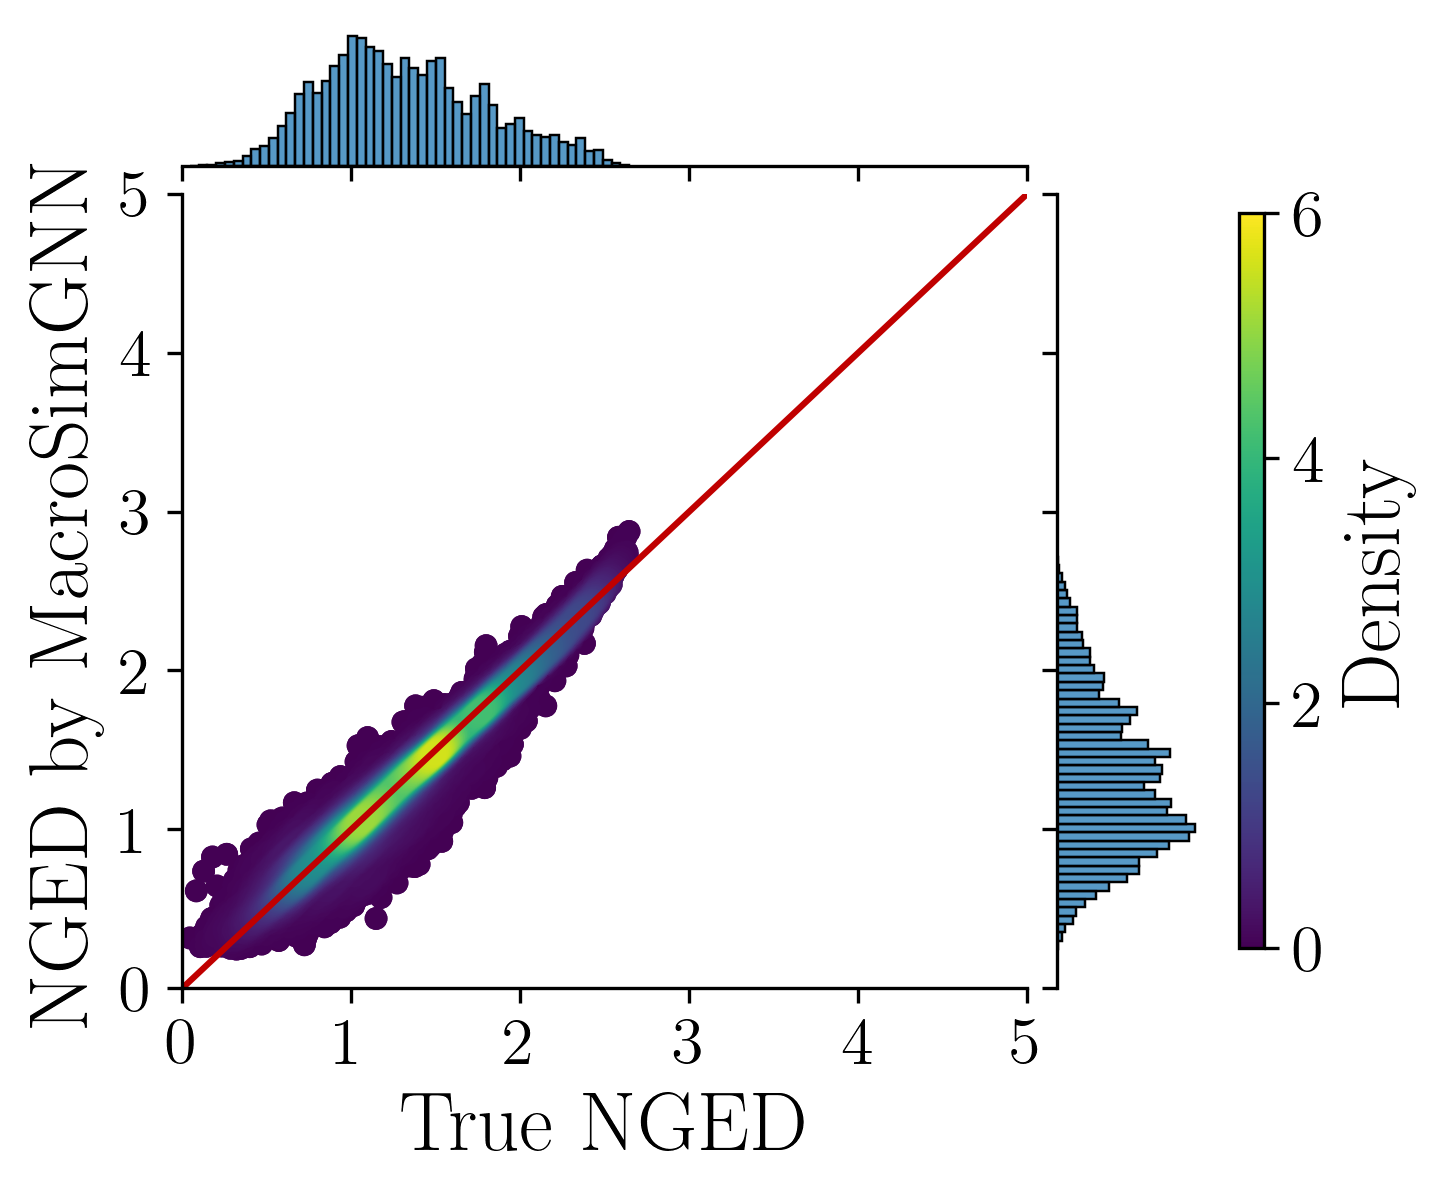

In [47]:
xy = np.vstack(
    [
        testing1_merged["testing1_nged_true"],
        testing1_merged["testing1_nged_macrosimgnn_predicted"],
    ]
)
z = gaussian_kde(xy)(xy)
idx = z.argsort()

x = testing1_merged["testing1_nged_true"][idx]
y = testing1_merged["testing1_nged_macrosimgnn_predicted"][idx]
z_sort = z[idx]

# Create the joint plot
g = sns.jointplot(
    x=x,
    y=y,
    kind="scatter",
    s=20,
    alpha=0.0,
    marginal_kws=dict(
        bins=50,
        fill=True,
    ),
)  # color='blue'

# Clear the axis for replotting with density coloring
g.ax_joint.cla()

kde = z_sort

# norm = Normalize(vmin=0, vmax=105)
# norm = Normalize(vmin=0, vmax=11)
# Plotting using the density for color mapping
scatter = g.ax_joint.scatter(
    x, y, c=kde, s=20, cmap="viridis", norm=Normalize(vmin=0, vmax=6)
)

# Add the line plot to the main axis
x_line = np.linspace(0, 5, 100)
g.ax_joint.plot(
    x_line,
    x_line,
    c="#C00000",
)

# Set the limits for x and y axes
g.ax_joint.set_xlim(-0.0, 5)
g.ax_joint.set_ylim(-0.0, 5)


ticks = [0, 1, 2, 3, 4, 5]
g.ax_joint.set_xticks(ticks)
g.ax_joint.set_yticks(ticks)
g.ax_joint.tick_params(axis="x", labelsize=16, colors="k")
g.ax_joint.tick_params(axis="y", labelsize=16, colors="k")

# Adjust the figure size and DPI
g.fig.set_size_inches(4.1, 3.5)
g.fig.dpi = 300
plt.xlabel("True NGED", size=20)
plt.ylabel("NGED by MacroSimGNN", size=20)

# Create an axis for the colorbar
cbar_ax = g.fig.add_axes(
    [0.93, 0.1, 0.02, 0.7]
)  # [x, y, width, height] in figure coordinate
cbar = plt.colorbar(scatter, cax=cbar_ax)
cbar.set_label("Density", fontsize=20)
cbar.ax.tick_params(labelsize=16)
cbar.set_ticks([0, 2, 4, 6])

# Adjust layout
# Adjust the right margin to make space for the colorbar
g.fig.subplots_adjust(right=0.9)

g.savefig("testing1_nged_true_vs_macrosimgnn.png", dpi=300)
plt.show()

### Testing-1 True NGED  vs NGED by Graph Kernel

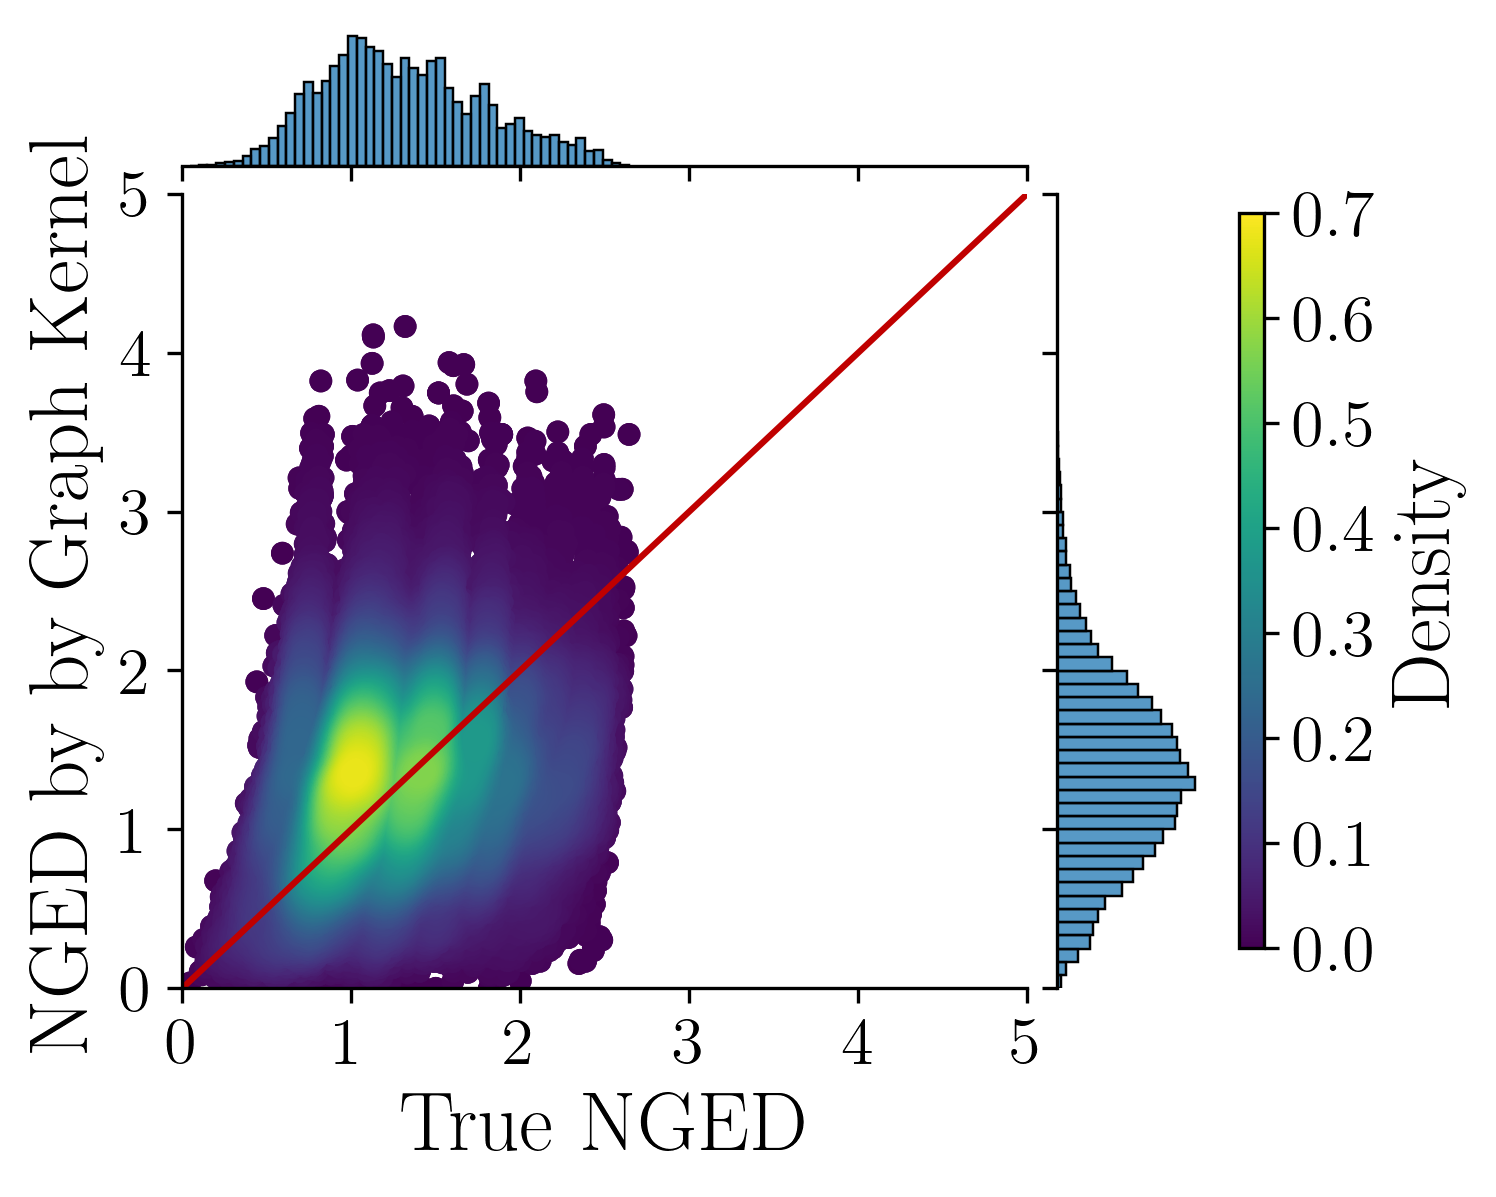

In [52]:
xy = np.vstack(
    [
        testing1_merged["testing1_nged_true"],
        testing1_merged["testing1_nged_graph_kernel"],
    ]
)
z = gaussian_kde(xy)(xy)
idx = z.argsort()

x = testing1_merged["testing1_nged_true"][idx]
y = testing1_merged["testing1_nged_graph_kernel"][idx]
z_sort = z[idx]

# Create the joint plot
g = sns.jointplot(
    x=x,
    y=y,
    kind="scatter",
    s=20,
    alpha=0.0,
    marginal_kws=dict(
        bins=50,
        fill=True,
    ),
)  # color='blue'

# Clear the axis for replotting with density coloring
g.ax_joint.cla()

kde = z_sort

# norm = Normalize(vmin=0, vmax=105)
# norm = Normalize(vmin=0, vmax=11)
# Plotting using the density for color mapping
scatter = g.ax_joint.scatter(
    x, y, c=kde, s=20, cmap="viridis", norm=Normalize(vmin=0, vmax=0.7)
)

# Add the line plot to the main axis
x_line = np.linspace(0, 5, 100)
g.ax_joint.plot(
    x_line,
    x_line,
    c="#C00000",
)

# Set the limits for x and y axes
g.ax_joint.set_xlim(-0.0, 5)
g.ax_joint.set_ylim(-0.0, 5)


ticks = [0, 1, 2, 3, 4, 5]
g.ax_joint.set_xticks(ticks)
g.ax_joint.set_yticks(ticks)
g.ax_joint.tick_params(axis="x", labelsize=16, colors="k")
g.ax_joint.tick_params(axis="y", labelsize=16, colors="k")

# Adjust the figure size and DPI
g.fig.set_size_inches(4.1, 3.5)
g.fig.dpi = 300
plt.xlabel("True NGED", size=20)
plt.ylabel("NGED by by Graph Kernel", size=20)

# Create an axis for the colorbar
cbar_ax = g.fig.add_axes(
    [0.93, 0.1, 0.02, 0.7]
)  # [x, y, width, height] in figure coordinate
cbar = plt.colorbar(scatter, cax=cbar_ax)
cbar.set_label("Density", fontsize=20)
cbar.ax.tick_params(labelsize=16)
cbar.set_ticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7])

# Adjust layout
# Adjust the right margin to make space for the colorbar
g.fig.subplots_adjust(right=0.9)

g.savefig("testing1_nged_true_vs_graph_kernel.png", dpi=300)
plt.show()

## Testing-2

### Testing-2 True NGED  vs NGED by MacroSimGNN

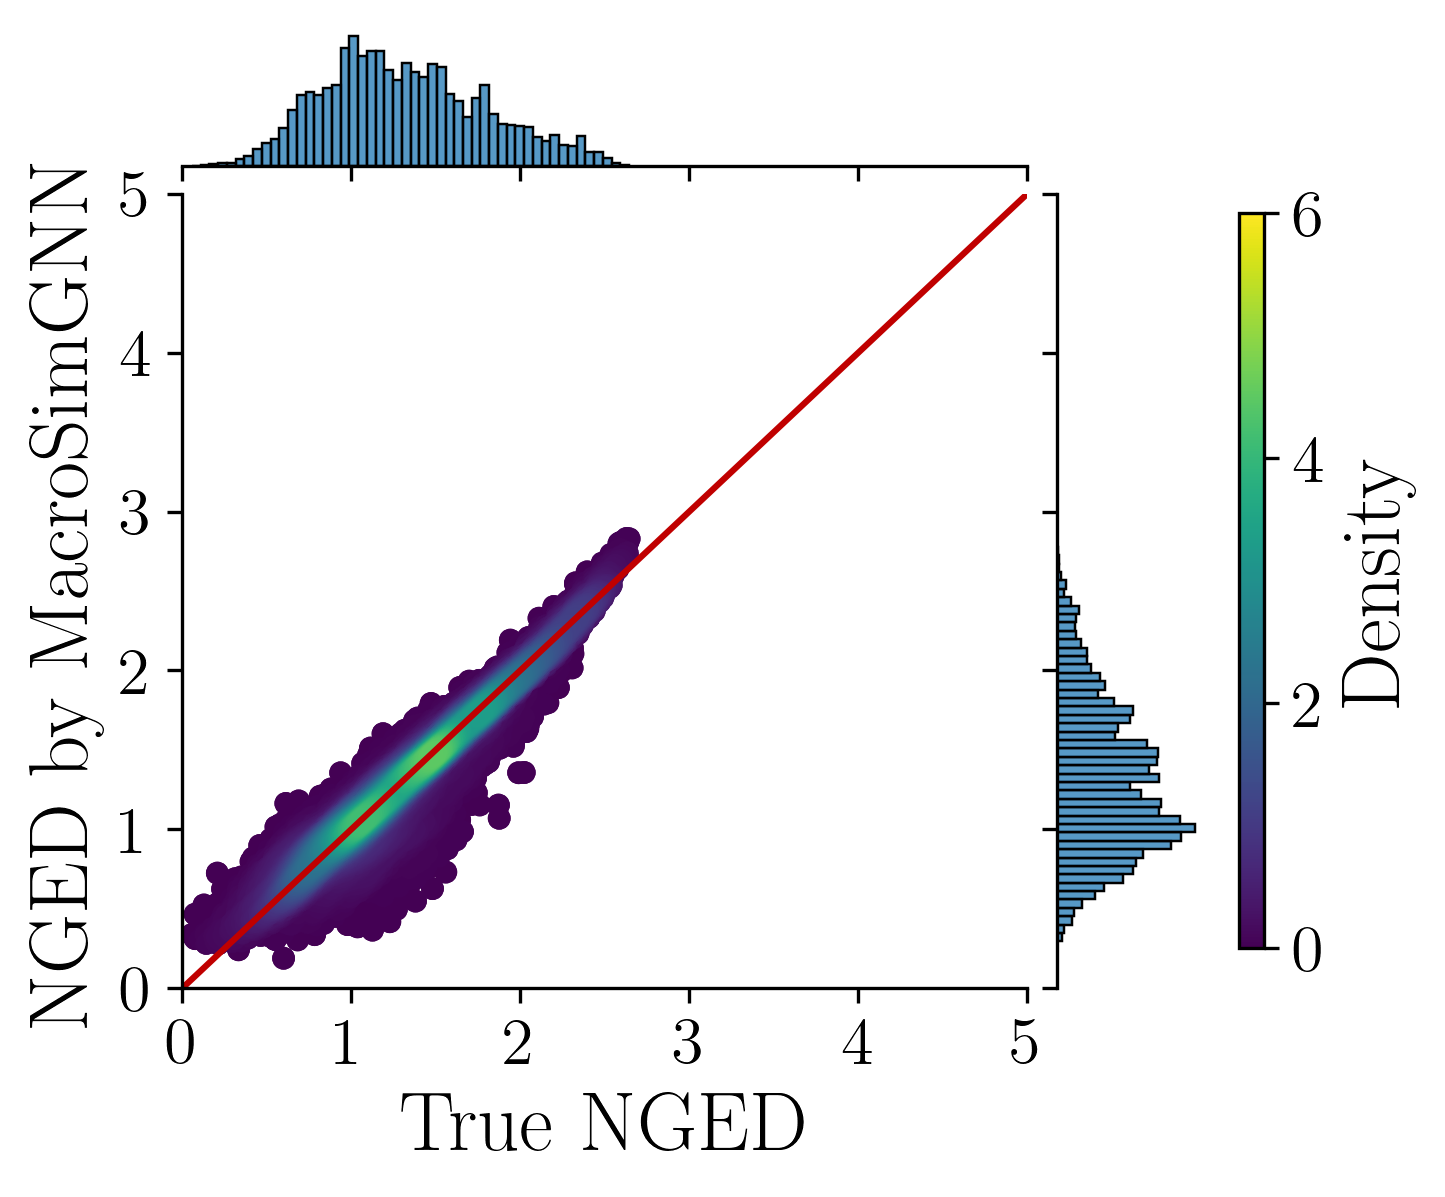

In [48]:
xy = np.vstack(
    [
        testing2_merged["testing2_nged_true"],
        testing2_merged["testing2_nged_macrosimgnn_predicted"],
    ]
)
z = gaussian_kde(xy)(xy)
idx = z.argsort()

x = testing2_merged["testing2_nged_true"][idx]
y = testing2_merged["testing2_nged_macrosimgnn_predicted"][idx]
z_sort = z[idx]

# Create the joint plot
g = sns.jointplot(
    x=x,
    y=y,
    kind="scatter",
    s=20,
    alpha=0.0,
    marginal_kws=dict(
        bins=50,
        fill=True,
    ),
)  # color='blue'

# Clear the axis for replotting with density coloring
g.ax_joint.cla()

kde = z_sort

# norm = Normalize(vmin=0, vmax=105)
# norm = Normalize(vmin=0, vmax=11)
# Plotting using the density for color mapping
scatter = g.ax_joint.scatter(
    x, y, c=kde, s=20, cmap="viridis", norm=Normalize(vmin=0, vmax=6)
)

# Add the line plot to the main axis
x_line = np.linspace(0, 5, 100)
g.ax_joint.plot(
    x_line,
    x_line,
    c="#C00000",
)

# Set the limits for x and y axes
g.ax_joint.set_xlim(-0.0, 5)
g.ax_joint.set_ylim(-0.0, 5)


ticks = [0, 1, 2, 3, 4, 5]
g.ax_joint.set_xticks(ticks)
g.ax_joint.set_yticks(ticks)
g.ax_joint.tick_params(axis="x", labelsize=16, colors="k")
g.ax_joint.tick_params(axis="y", labelsize=16, colors="k")

# Adjust the figure size and DPI
g.fig.set_size_inches(4.1, 3.5)
g.fig.dpi = 300
plt.xlabel("True NGED", size=20)
plt.ylabel("NGED by MacroSimGNN", size=20)

# Create an axis for the colorbar
cbar_ax = g.fig.add_axes(
    [0.93, 0.1, 0.02, 0.7]
)  # [x, y, width, height] in figure coordinate
cbar = plt.colorbar(scatter, cax=cbar_ax)
cbar.set_label("Density", fontsize=20)
cbar.ax.tick_params(labelsize=16)
cbar.set_ticks([0, 2, 4, 6])

# Adjust layout
# Adjust the right margin to make space for the colorbar
g.fig.subplots_adjust(right=0.9)

g.savefig("testing2_nged_true_vs_macrosimgnn.png", dpi=300)
plt.show()

### Testing-2 True NGED  vs NGED by Graph Kernel

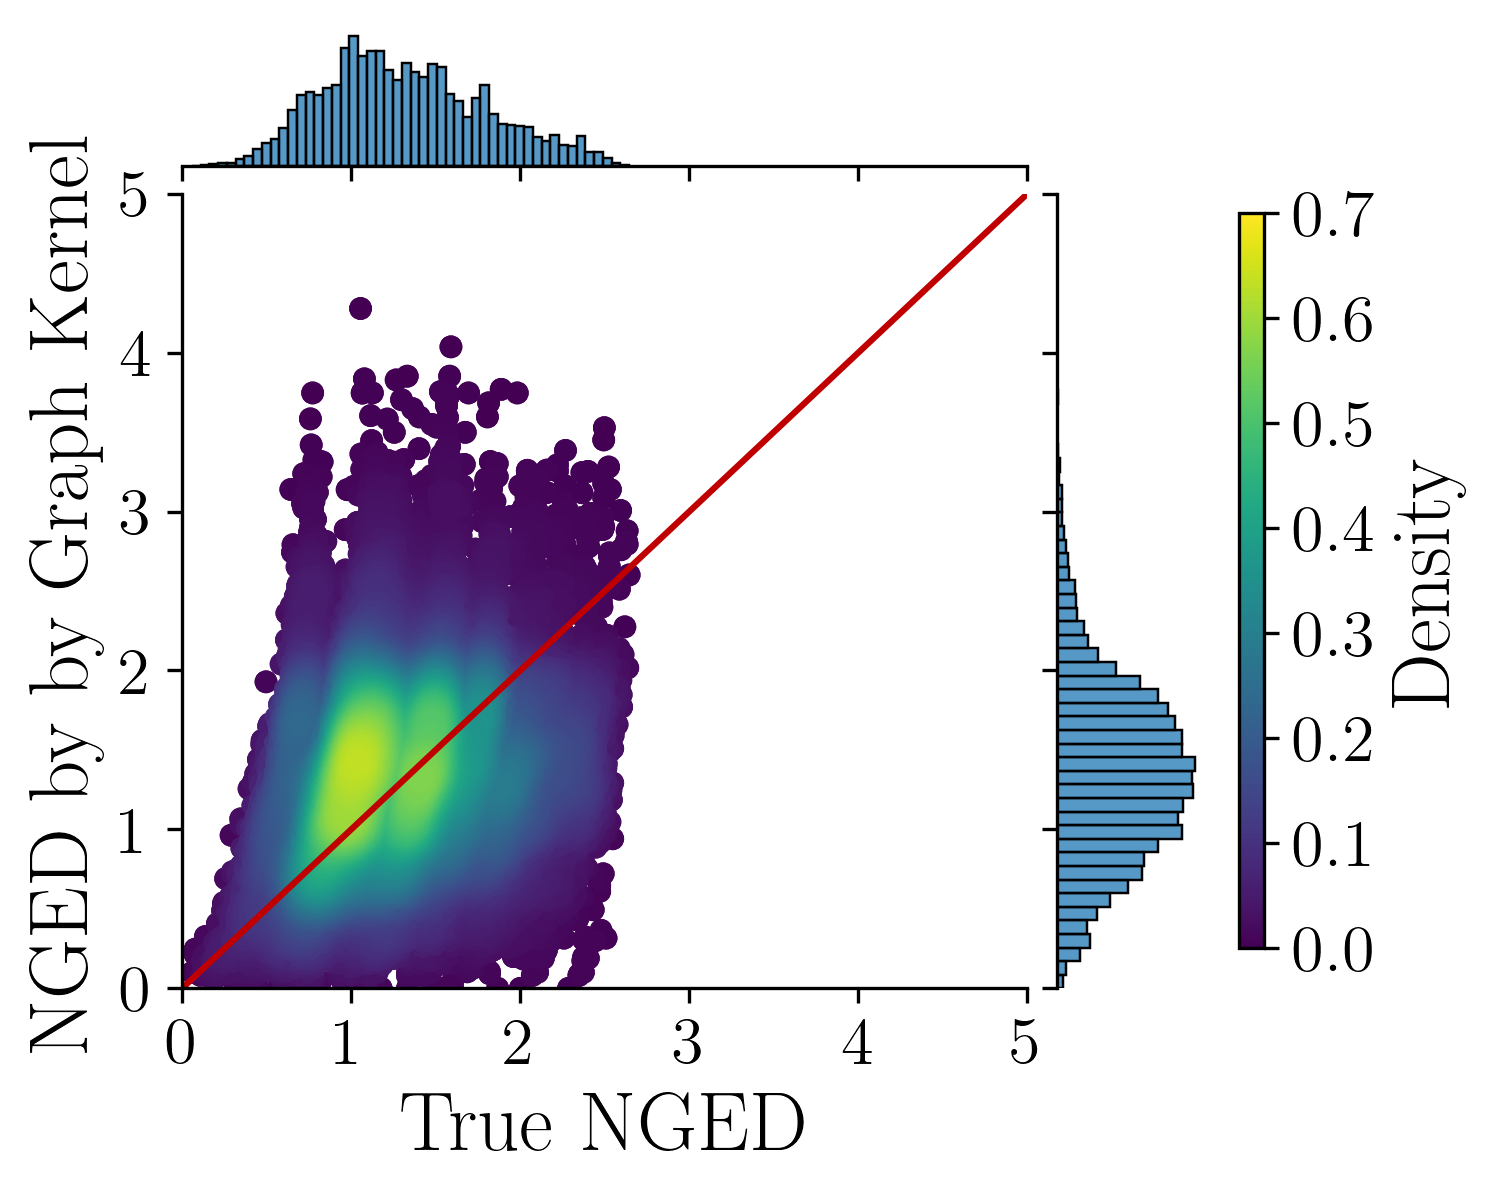

In [53]:
xy = np.vstack(
    [
        testing2_merged["testing2_nged_true"],
        testing2_merged["testing2_nged_graph_kernel"],
    ]
)
z = gaussian_kde(xy)(xy)
idx = z.argsort()

x = testing2_merged["testing2_nged_true"][idx]
y = testing2_merged["testing2_nged_graph_kernel"][idx]
z_sort = z[idx]

# Create the joint plot
g = sns.jointplot(
    x=x,
    y=y,
    kind="scatter",
    s=20,
    alpha=0.0,
    marginal_kws=dict(
        bins=50,
        fill=True,
    ),
)  # color='blue'

# Clear the axis for replotting with density coloring
g.ax_joint.cla()

kde = z_sort

# norm = Normalize(vmin=0, vmax=105)
# norm = Normalize(vmin=0, vmax=11)
# Plotting using the density for color mapping
scatter = g.ax_joint.scatter(
    x, y, c=kde, s=20, cmap="viridis", norm=Normalize(vmin=0, vmax=0.7)
)

# Add the line plot to the main axis
x_line = np.linspace(0, 5, 100)
g.ax_joint.plot(
    x_line,
    x_line,
    c="#C00000",
)

# Set the limits for x and y axes
g.ax_joint.set_xlim(-0.0, 5)
g.ax_joint.set_ylim(-0.0, 5)


ticks = [0, 1, 2, 3, 4, 5]
g.ax_joint.set_xticks(ticks)
g.ax_joint.set_yticks(ticks)
g.ax_joint.tick_params(axis="x", labelsize=16, colors="k")
g.ax_joint.tick_params(axis="y", labelsize=16, colors="k")

# Adjust the figure size and DPI
g.fig.set_size_inches(4.1, 3.5)
g.fig.dpi = 300
plt.xlabel("True NGED", size=20)
plt.ylabel("NGED by by Graph Kernel", size=20)

# Create an axis for the colorbar
cbar_ax = g.fig.add_axes(
    [0.93, 0.1, 0.02, 0.7]
)  # [x, y, width, height] in figure coordinate
cbar = plt.colorbar(scatter, cax=cbar_ax)
cbar.set_label("Density", fontsize=20)
cbar.ax.tick_params(labelsize=16)
cbar.set_ticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7])

# Adjust layout
# Adjust the right margin to make space for the colorbar
g.fig.subplots_adjust(right=0.9)

g.savefig("testing2_nged_true_vs_graph_kernel.png", dpi=300)
plt.show()

# GED

## Testing-1

### Testing-1 True GED  vs GED by MacroSimGNN

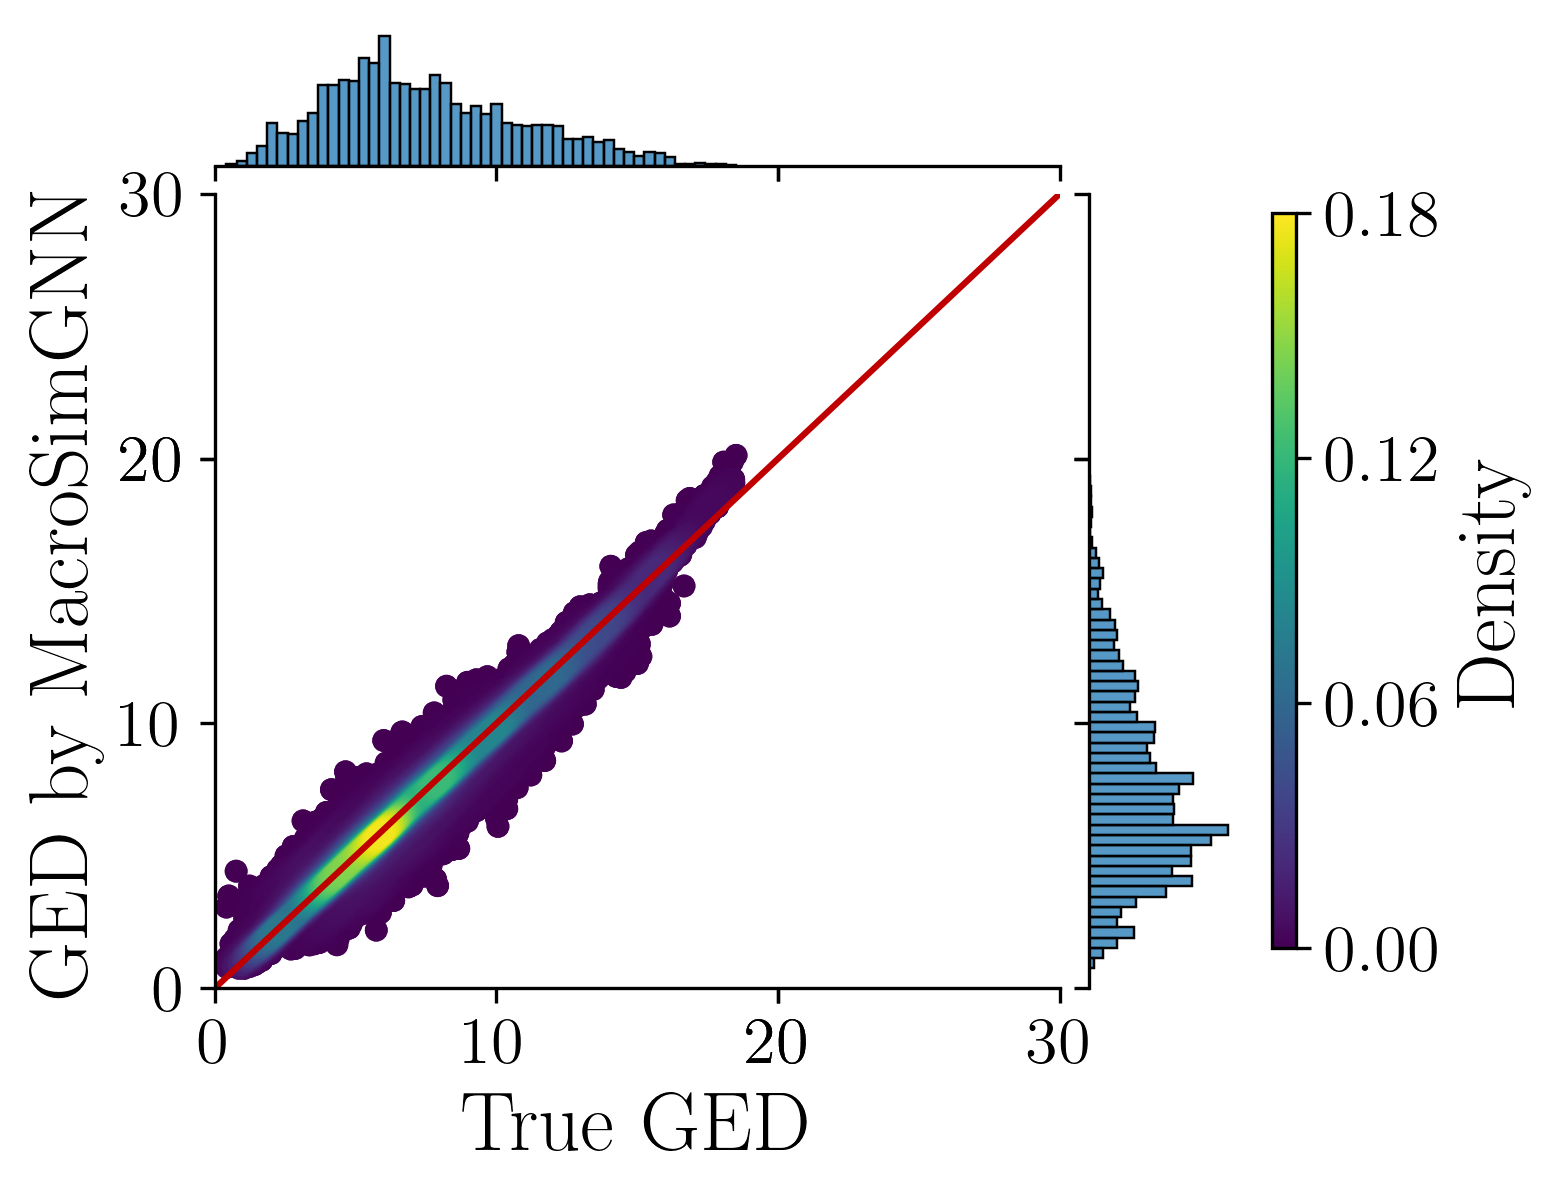

In [54]:
xy = np.vstack(
    [
        testing1_merged["testing1_ged_true"],
        testing1_merged["testing1_ged_macrosimgnn_predicted"],
    ]
)
z = gaussian_kde(xy)(xy)
idx = z.argsort()

x = testing1_merged["testing1_ged_true"][idx]
y = testing1_merged["testing1_ged_macrosimgnn_predicted"][idx]
z_sort = z[idx]

# Create the joint plot
g = sns.jointplot(
    x=x,
    y=y,
    kind="scatter",
    s=20,
    alpha=0.0,
    marginal_kws=dict(
        bins=50,
        fill=True,
    ),
)  # color='blue'

# Clear the axis for replotting with density coloring
g.ax_joint.cla()

kde = z_sort

# norm = Normalize(vmin=0, vmax=105)
# norm = Normalize(vmin=0, vmax=11)
# Plotting using the density for color mapping
scatter = g.ax_joint.scatter(
    x, y, c=kde, s=20, cmap="viridis", norm=Normalize(vmin=0, vmax=0.18)
)

# Add the line plot to the main axis
x_line = np.linspace(0, 30, 100)
g.ax_joint.plot(
    x_line,
    x_line,
    c="#C00000",
)

# Set the limits for x and y axes
g.ax_joint.set_xlim(-0.0, 30)
g.ax_joint.set_ylim(-0.0, 30)


ticks = [0, 10, 20, 20, 30]
g.ax_joint.set_xticks(ticks)
g.ax_joint.set_yticks(ticks)
g.ax_joint.tick_params(axis="x", labelsize=16, colors="k")
g.ax_joint.tick_params(axis="y", labelsize=16, colors="k")

# Adjust the figure size and DPI
g.fig.set_size_inches(4.1, 3.5)
g.fig.dpi = 300
plt.xlabel("True GED", size=20)
plt.ylabel("GED by MacroSimGNN", size=20)

# Create an axis for the colorbar
cbar_ax = g.fig.add_axes(
    [0.93, 0.1, 0.02, 0.7]
)  # [x, y, width, height] in figure coordinate
cbar = plt.colorbar(scatter, cax=cbar_ax)
cbar.set_label("Density", fontsize=20)
cbar.ax.tick_params(labelsize=16)
cbar.set_ticks([0, 0.06, 0.12, 0.18])

# Adjust layout
# Adjust the right margin to make space for the colorbar
g.fig.subplots_adjust(right=0.9)

g.savefig("testing1_ged_true_vs_macrosimgnn.png", dpi=300)
plt.show()

### Testing-1 True GED  vs GED by Graph Kernel

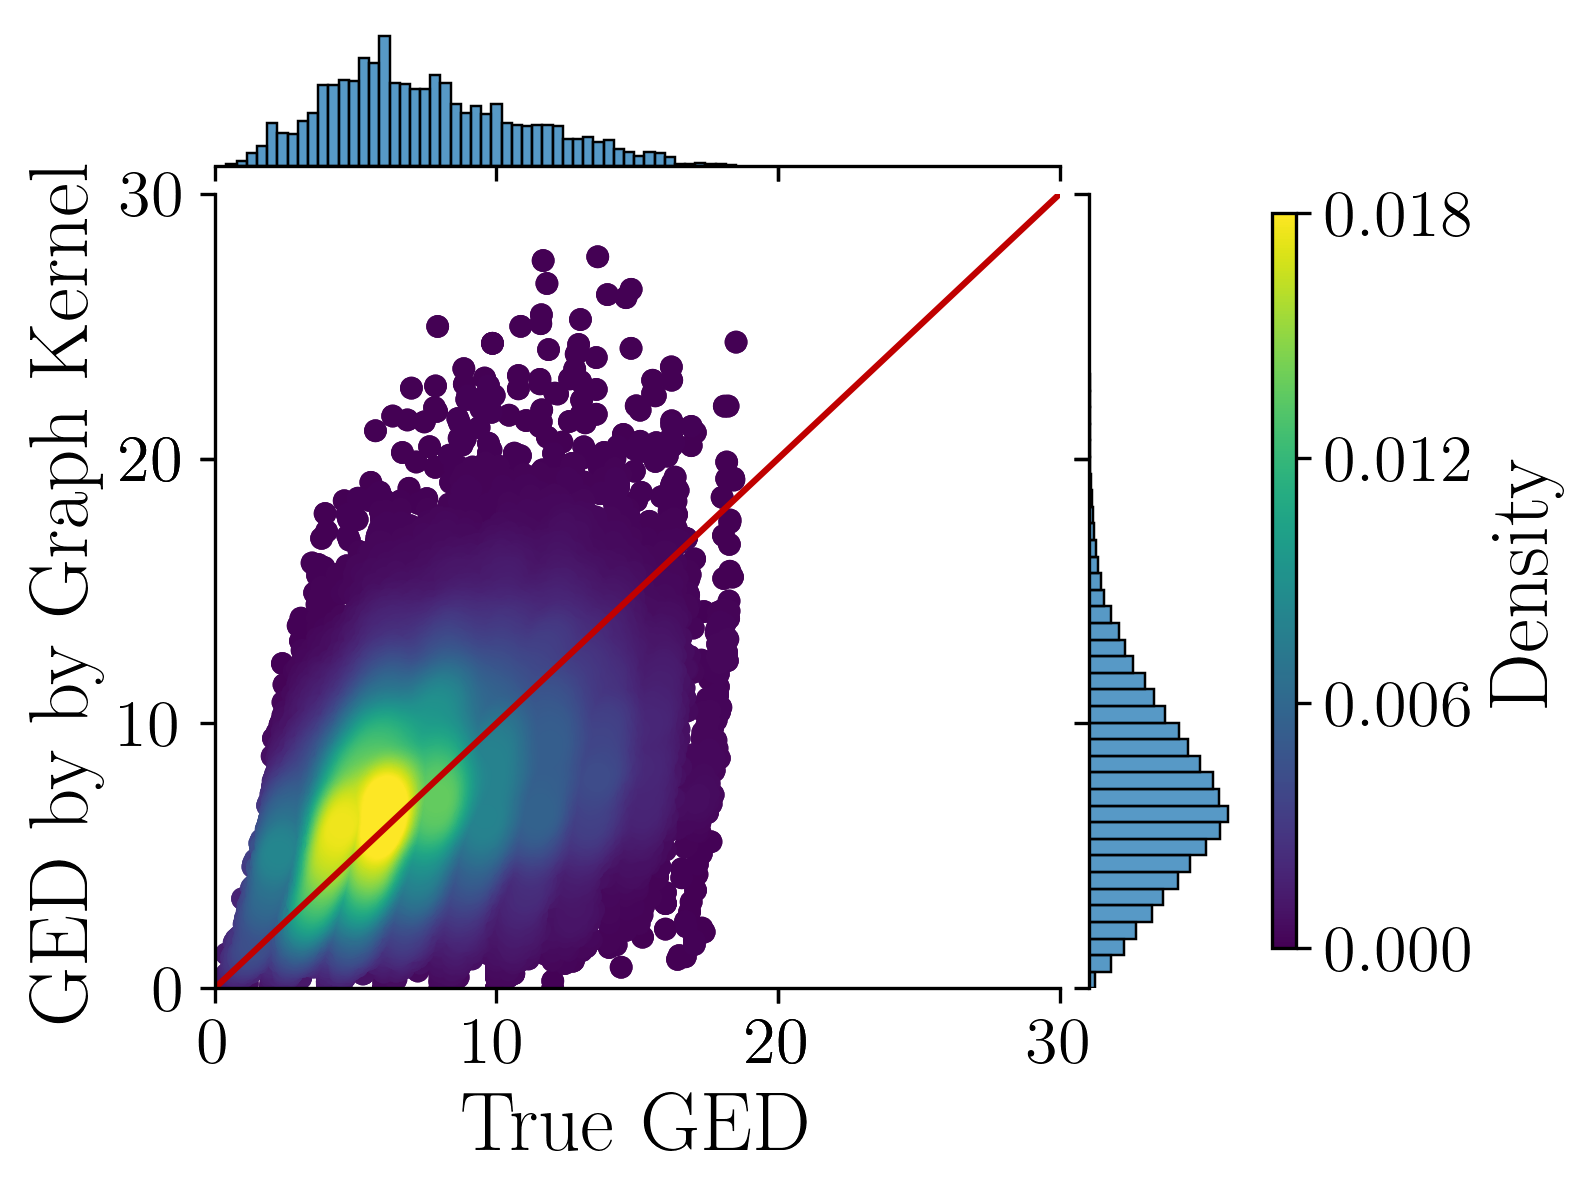

In [60]:
xy = np.vstack(
    [testing1_merged["testing1_ged_true"], testing1_merged["testing1_ged_graph_kernel"]]
)
z = gaussian_kde(xy)(xy)
idx = z.argsort()

x = testing1_merged["testing1_ged_true"][idx]
y = testing1_merged["testing1_ged_graph_kernel"][idx]
z_sort = z[idx]

# Create the joint plot
g = sns.jointplot(
    x=x,
    y=y,
    kind="scatter",
    s=20,
    alpha=0.0,
    marginal_kws=dict(
        bins=50,
        fill=True,
    ),
)  # color='blue'

# Clear the axis for replotting with density coloring
g.ax_joint.cla()

kde = z_sort

# norm = Normalize(vmin=0, vmax=105)
# norm = Normalize(vmin=0, vmax=11)
# Plotting using the density for color mapping
scatter = g.ax_joint.scatter(
    x, y, c=kde, s=20, cmap="viridis", norm=Normalize(vmin=0, vmax=0.018)
)

# Add the line plot to the main axis
x_line = np.linspace(0, 30, 100)
g.ax_joint.plot(
    x_line,
    x_line,
    c="#C00000",
)

# Set the limits for x and y axes
g.ax_joint.set_xlim(-0.0, 30)
g.ax_joint.set_ylim(-0.0, 30)


ticks = [0, 10, 20, 20, 30]
g.ax_joint.set_xticks(ticks)
g.ax_joint.set_yticks(ticks)
g.ax_joint.tick_params(axis="x", labelsize=16, colors="k")
g.ax_joint.tick_params(axis="y", labelsize=16, colors="k")

# Adjust the figure size and DPI
g.fig.set_size_inches(4.1, 3.5)
g.fig.dpi = 300
plt.xlabel("True GED", size=20)
plt.ylabel("GED by by Graph Kernel", size=20)

# Create an axis for the colorbar
cbar_ax = g.fig.add_axes(
    [0.93, 0.1, 0.02, 0.7]
)  # [x, y, width, height] in figure coordinate
cbar = plt.colorbar(scatter, cax=cbar_ax)
cbar.set_label("Density", fontsize=20)
cbar.ax.tick_params(labelsize=16)
cbar.set_ticks([0, 0.006, 0.012, 0.018])

# Adjust layout
# Adjust the right margin to make space for the colorbar
g.fig.subplots_adjust(right=0.9)

g.savefig("testing1_ged_true_vs_graph_kernel.png", dpi=300)
plt.show()

## Testing-2

### Testing-2 True GED  vs GED by MacroSimGNN

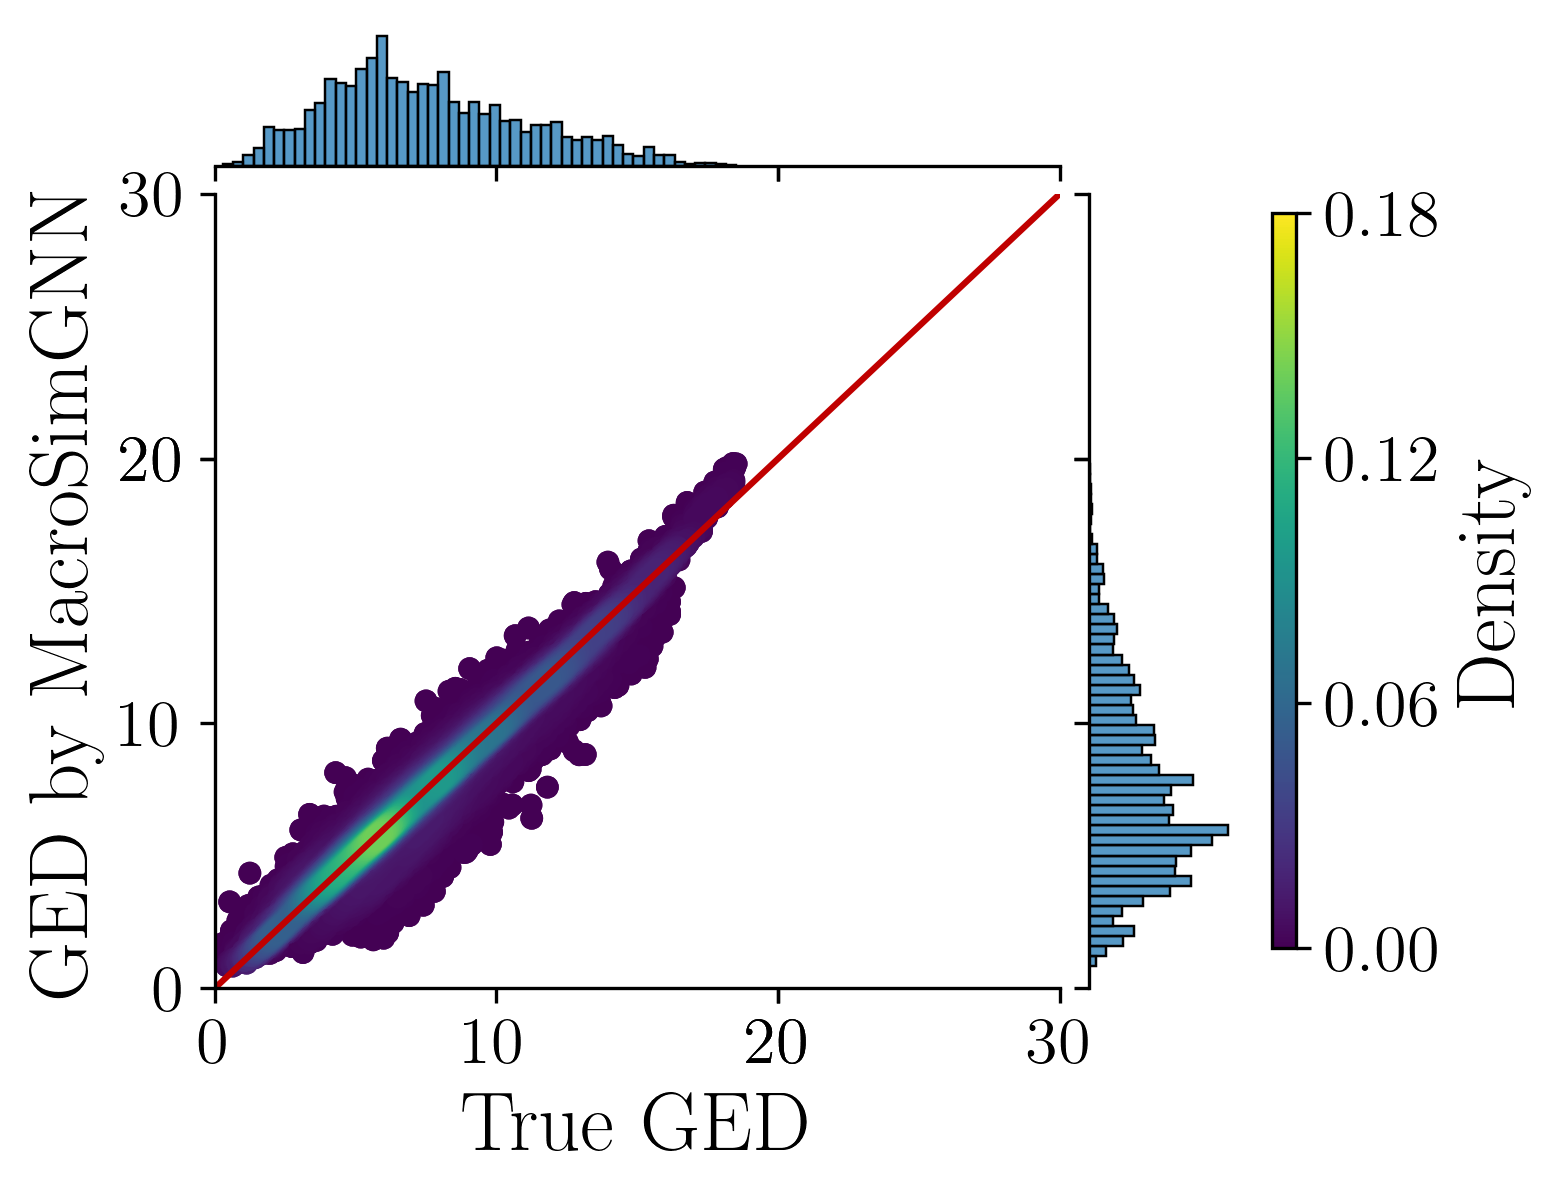

In [55]:
xy = np.vstack(
    [
        testing2_merged["testing2_ged_true"],
        testing2_merged["testing2_ged_macrosimgnn_predicted"],
    ]
)
z = gaussian_kde(xy)(xy)
idx = z.argsort()

x = testing2_merged["testing2_ged_true"][idx]
y = testing2_merged["testing2_ged_macrosimgnn_predicted"][idx]
z_sort = z[idx]

# Create the joint plot
g = sns.jointplot(
    x=x,
    y=y,
    kind="scatter",
    s=20,
    alpha=0.0,
    marginal_kws=dict(
        bins=50,
        fill=True,
    ),
)  # color='blue'

# Clear the axis for replotting with density coloring
g.ax_joint.cla()

kde = z_sort

# norm = Normalize(vmin=0, vmax=105)
# norm = Normalize(vmin=0, vmax=11)
# Plotting using the density for color mapping
scatter = g.ax_joint.scatter(
    x, y, c=kde, s=20, cmap="viridis", norm=Normalize(vmin=0, vmax=0.18)
)

# Add the line plot to the main axis
x_line = np.linspace(0, 30, 100)
g.ax_joint.plot(
    x_line,
    x_line,
    c="#C00000",
)

# Set the limits for x and y axes
g.ax_joint.set_xlim(-0.0, 30)
g.ax_joint.set_ylim(-0.0, 30)


ticks = [0, 10, 20, 20, 30]
g.ax_joint.set_xticks(ticks)
g.ax_joint.set_yticks(ticks)
g.ax_joint.tick_params(axis="x", labelsize=16, colors="k")
g.ax_joint.tick_params(axis="y", labelsize=16, colors="k")

# Adjust the figure size and DPI
g.fig.set_size_inches(4.1, 3.5)
g.fig.dpi = 300
plt.xlabel("True GED", size=20)
plt.ylabel("GED by MacroSimGNN", size=20)

# Create an axis for the colorbar
cbar_ax = g.fig.add_axes(
    [0.93, 0.1, 0.02, 0.7]
)  # [x, y, width, height] in figure coordinate
cbar = plt.colorbar(scatter, cax=cbar_ax)
cbar.set_label("Density", fontsize=20)
cbar.ax.tick_params(labelsize=16)
cbar.set_ticks([0, 0.06, 0.12, 0.18])

# Adjust layout
# Adjust the right margin to make space for the colorbar
g.fig.subplots_adjust(right=0.9)

g.savefig("testing2_ged_true_vs_macrosimgnn.png", dpi=300)
plt.show()

### Testing-2 True GED  vs GED by Graph Kernel

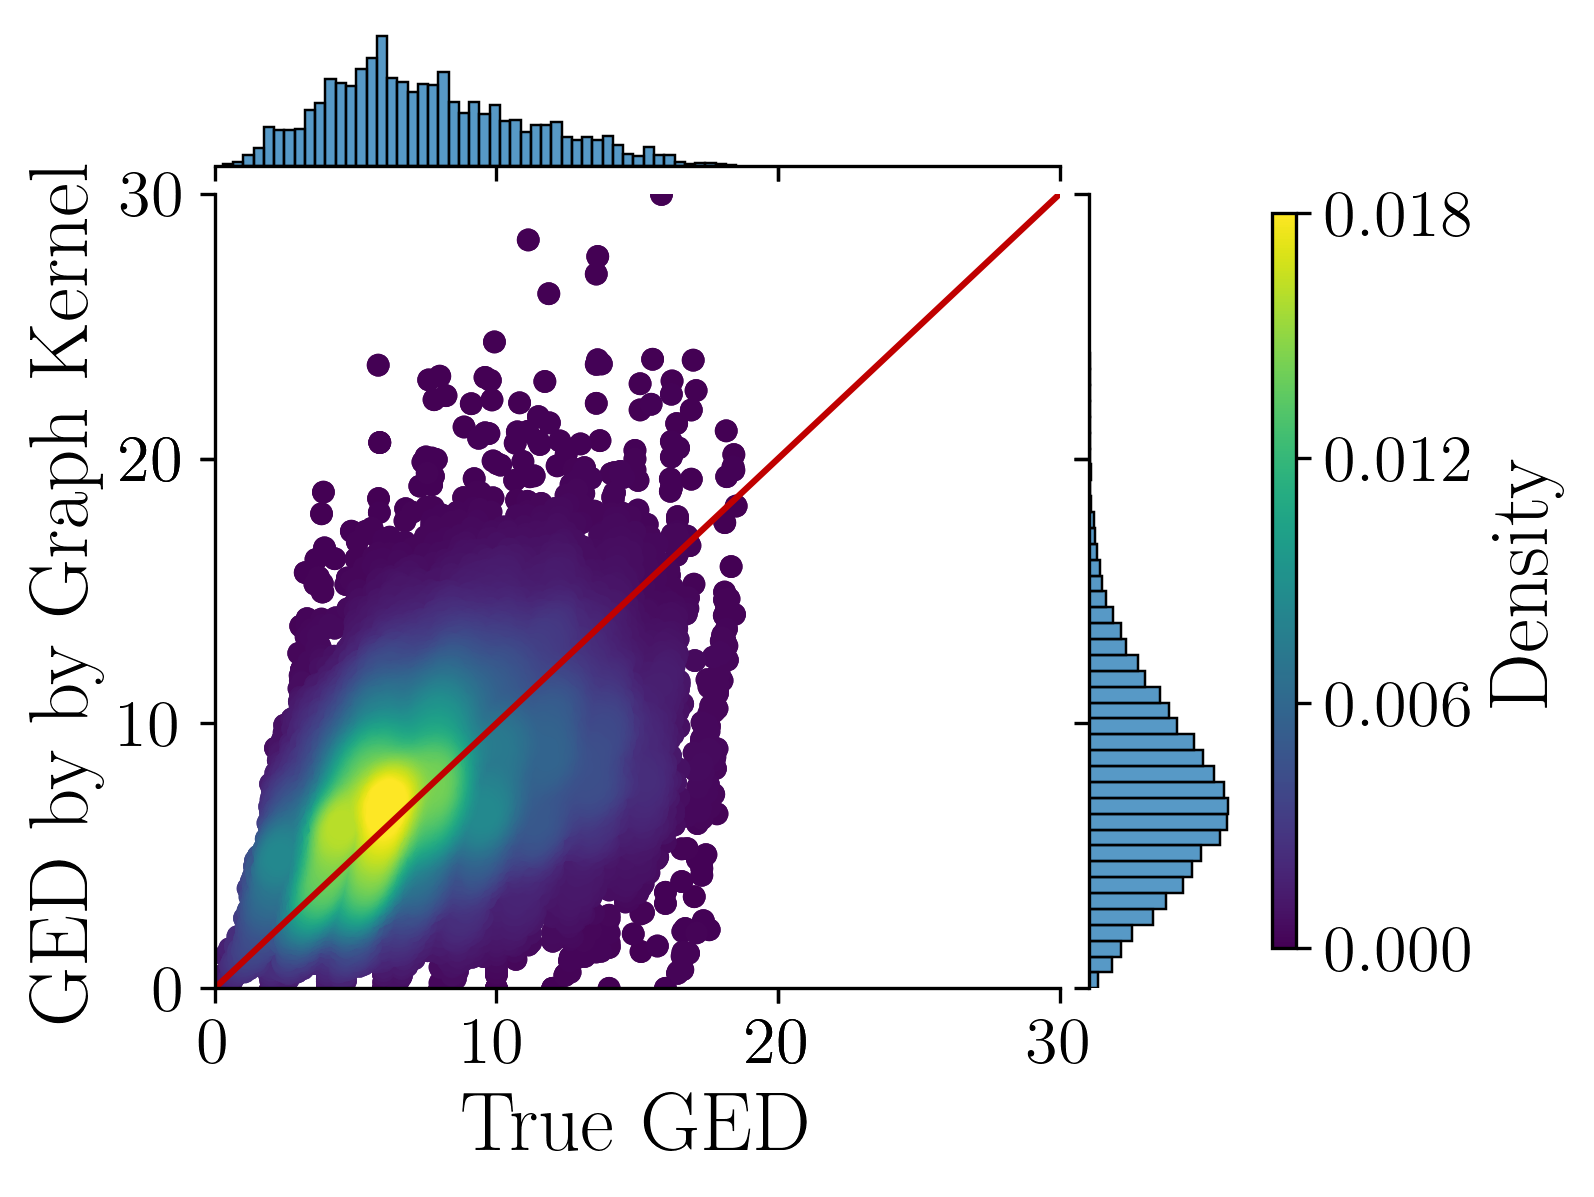

In [61]:
xy = np.vstack(
    [testing2_merged["testing2_ged_true"], testing2_merged["testing2_ged_graph_kernel"]]
)
z = gaussian_kde(xy)(xy)
idx = z.argsort()

x = testing2_merged["testing2_ged_true"][idx]
y = testing2_merged["testing2_ged_graph_kernel"][idx]
z_sort = z[idx]

# Create the joint plot
g = sns.jointplot(
    x=x,
    y=y,
    kind="scatter",
    s=20,
    alpha=0.0,
    marginal_kws=dict(
        bins=50,
        fill=True,
    ),
)  # color='blue'

# Clear the axis for replotting with density coloring
g.ax_joint.cla()

kde = z_sort

# norm = Normalize(vmin=0, vmax=105)
# norm = Normalize(vmin=0, vmax=11)
# Plotting using the density for color mapping
scatter = g.ax_joint.scatter(
    x, y, c=kde, s=20, cmap="viridis", norm=Normalize(vmin=0, vmax=0.018)
)

# Add the line plot to the main axis
x_line = np.linspace(0, 30, 100)
g.ax_joint.plot(
    x_line,
    x_line,
    c="#C00000",
)

# Set the limits for x and y axes
g.ax_joint.set_xlim(-0.0, 30)
g.ax_joint.set_ylim(-0.0, 30)


ticks = [0, 10, 20, 20, 30]
g.ax_joint.set_xticks(ticks)
g.ax_joint.set_yticks(ticks)
g.ax_joint.tick_params(axis="x", labelsize=16, colors="k")
g.ax_joint.tick_params(axis="y", labelsize=16, colors="k")

# Adjust the figure size and DPI
g.fig.set_size_inches(4.1, 3.5)
g.fig.dpi = 300
plt.xlabel("True GED", size=20)
plt.ylabel("GED by by Graph Kernel", size=20)

# Create an axis for the colorbar
cbar_ax = g.fig.add_axes(
    [0.93, 0.1, 0.02, 0.7]
)  # [x, y, width, height] in figure coordinate
cbar = plt.colorbar(scatter, cax=cbar_ax)
cbar.set_label("Density", fontsize=20)
cbar.ax.tick_params(labelsize=16)
cbar.set_ticks([0, 0.006, 0.012, 0.018])

# Adjust layout
# Adjust the right margin to make space for the colorbar
g.fig.subplots_adjust(right=0.9)

g.savefig("testing2_ged_true_vs_graph_kernel.png", dpi=300)
plt.show()